<a href="https://colab.research.google.com/github/feliperodighero/Machine-Learning-Study/blob/main/RegressaoLinearStatsModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('mt_cars.csv')

In [3]:
df.shape

(32, 12)

In [4]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


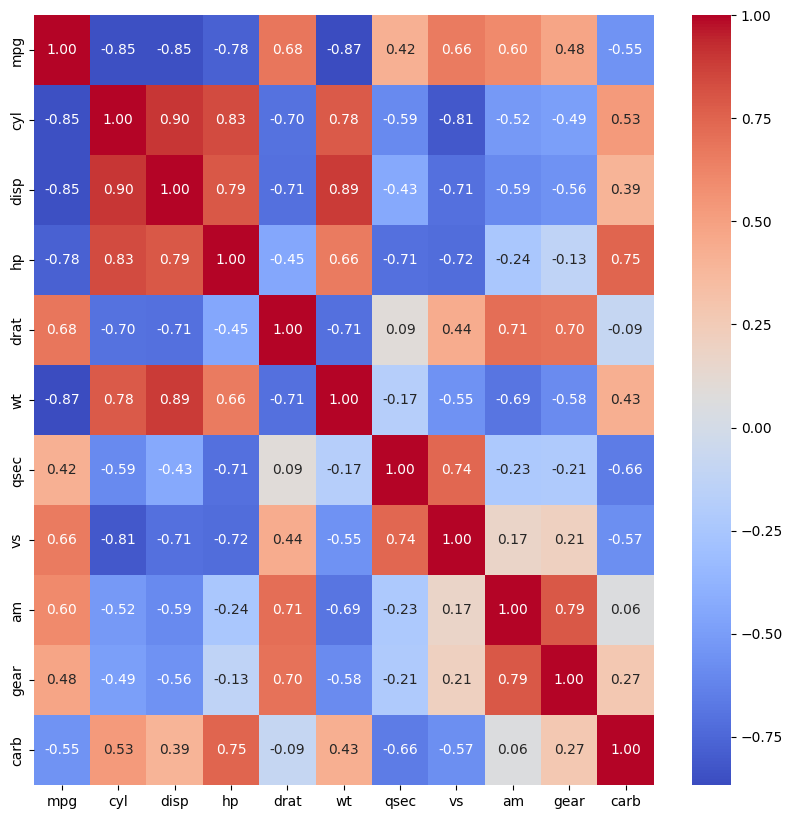

In [10]:
corr = df.corr()

fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f');

In [11]:
column_pairs = [('mpg', 'cyl'), ('mpg', 'disp'), ('mpg', 'hp'), ('mpg', 'wt'), ('mpg', 'drat'), ('mpg', 'vs')]

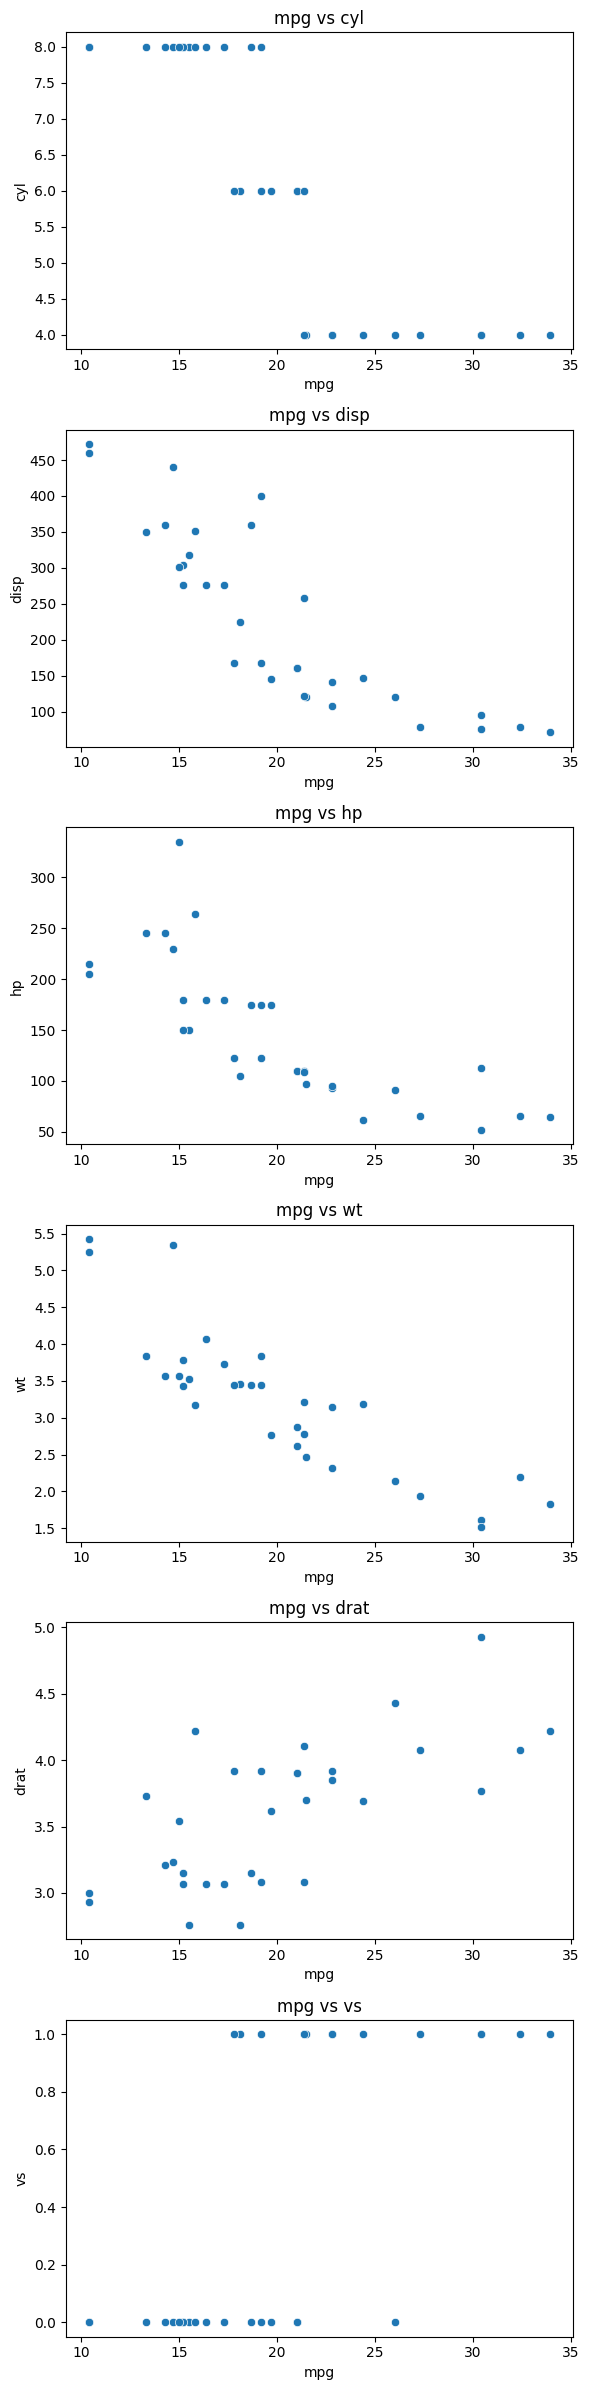

In [12]:
n_plots = len(column_pairs)

fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6, 4 * n_plots))

for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(data=df, x=x_col, y=y_col, ax=axes[i])
    axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

In [27]:
# model = smf.ols(formula='mpg ~ wt + disp + hp', data=df)
# model = smf.ols(formula='mpg ~ disp + cyl', data=df)

model = smf.ols(formula='mpg ~ drat + vs', data=df)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           5.82e-07
Time:                        19:02:34   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.7

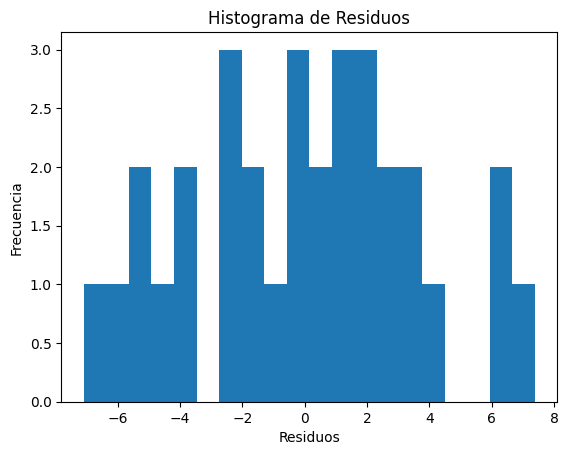

In [28]:
residuos = results.resid

plt.hist(residuos, bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

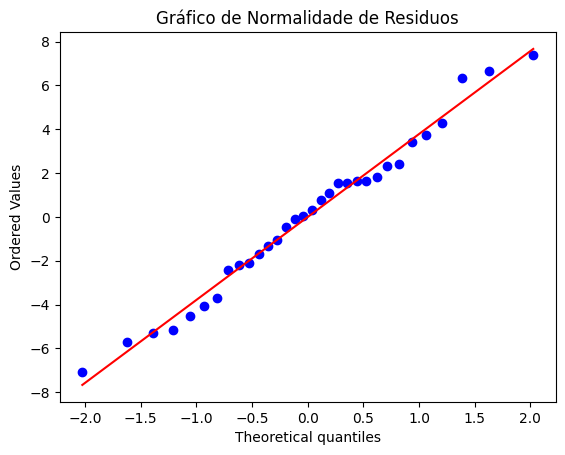

In [29]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Gráfico de Normalidade de Residuos')
plt.show()

In [30]:
# h0 - dados estão normalmente distribuídos
# p <= 0.05 a hípotese nula, (não estão normalmente distribuídos)
# p > 0.05 não é possível rejeiter a hípotese nula

stat, pval = stats.shapiro(residuos)
print(f'Estadístico de Shapiro-Wilk: {stat:.3f}')
print(f'Valor p: {pval:.3f}')

Estadístico de Shapiro-Wilk: 0.981
Valor p: 0.822
